# **Deep learning entry task**
 <img src="https://www.tu-braunschweig.de/typo3conf/ext/tu_braunschweig/Resources/Public/Images/Logos/tu_braunschweig_logo.svg" align="right" width="200px"/>

[Institute of Geodesy and Photogrammetry](https://www.tu-braunschweig.de/en/igp),  
[The Technical University of Braunschweig  ](https://www.tu-braunschweig.de/en/)  
Instructors: [Dr. -Ing. Mehdi Maboudi](https://www.tu-braunschweig.de/en/igp/staff/mehdi-maboudi) and [Dr. Pedro Achanccaray](https://www.tu-braunschweig.de/en/igp/staff/pedro-diaz)
<br clear="left"/>

The purpose of this entry task is to measure your **knowledge of machine learning and artificial neural network concepts**. You should be familiar with these topics for **better understanding and comprehension** of the deep learning course.


For this reason, the entry task should be solved **without using any artificial intelligence tools** (ChatGPT, Copilot, among others). You can only use them to assist you in **debugging** your code.

# **1. Import all necessary packages**

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# **2. Load the Fashion MNIST dataset for image classification**

- Load the Fashion MNIST dataset.
- Create three disjoint sets: train, validation and test (you can use any proportions for these sets).

In [80]:
# Load Fashion MNIST dataset
mnist_fashion = fetch_openml('Fashion-MNIST', cache=True)
X = mnist_fashion['data']
y = mnist_fashion['target']

# Convert labels into integer datatype
y = y.astype('int')

# Define classes
classes = ['tshirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot'] 

# Split dataset into train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X/255.0, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)



C:\Users\Lenovo\miniconda3\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In your own words, describe the purpose of each set:
- _train_:
- _validation_:
- _test_:


The training set is used to teach the machine learning model by showing it a large amount of data and their corresponding labels. This helps the model learn patterns and relationships between inputs (like images of fashion items) and outputs (categories of those items).

The validation set is used to fine-tune the model's settings, called hyperparameters, and to check how well the model is performing during training. It acts as a sort of "practice test" using data that the model hasn't seen before.

The test set is used as the final evaluation of the model's performance after it has been trained and validated. It's completely separate from the training and validation data and provides an unbiased measure of how well the model will perform on new, unseen data.

# **3. Create a Multi Layer Perceptron (MLP) for image classification**


Feel free to use any configuration (number of hidden layers, number of neurons per layer) and framework (Scikit learn, Keras, TensorFlow, PyTorch, etc.)

In [82]:
# MLP Model using Keras
def get_model():
    model = Sequential()
    model.add(Flatten(input_shape=(X.shape[1],)))  # input layer
    model.add(Dense(64, activation='relu'))  # hidden layer 1
    model.add(Dense(128, activation='relu'))  # hidden layer 2
    model.add(Dense(10, activation='softmax'))  # output layer
    return model

# **4. Train the model**

Train the model and perform a hyperparameter tuning to find the best learning rate from a set of learning rates (1D grid search).

In [83]:
# Define learning rates for hyperparameter tuning
learning_rates = [0.1, 0.01, 0.001]
histories = []

# Hyperparameter tuning and training
for lr in learning_rates:
    model = get_model()
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), verbose=0)
    histories.append(history)

# **5. Plots**

Plot the evolution of the Loss function and Accuracy values over the epochs (for train and validation sets) during training the best model.

- What can you infere from the training curves of the model? 
- Is there over- or underfitting?

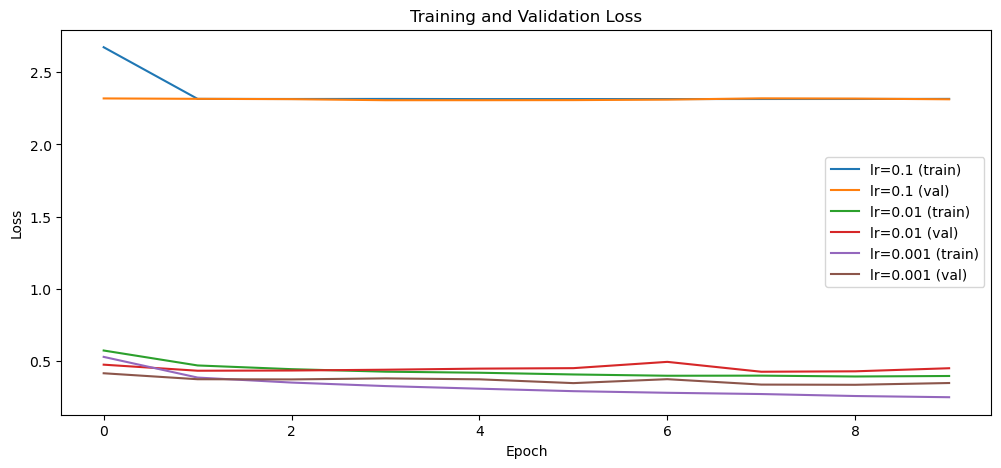

In [84]:
plt.figure(figsize=(12, 5))
for i, history in enumerate(histories):
    lr = learning_rates[i]
    plt.plot(history.history['loss'], label=f'lr={lr} (train)')
    plt.plot(history.history['val_loss'], label=f'lr={lr} (val)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

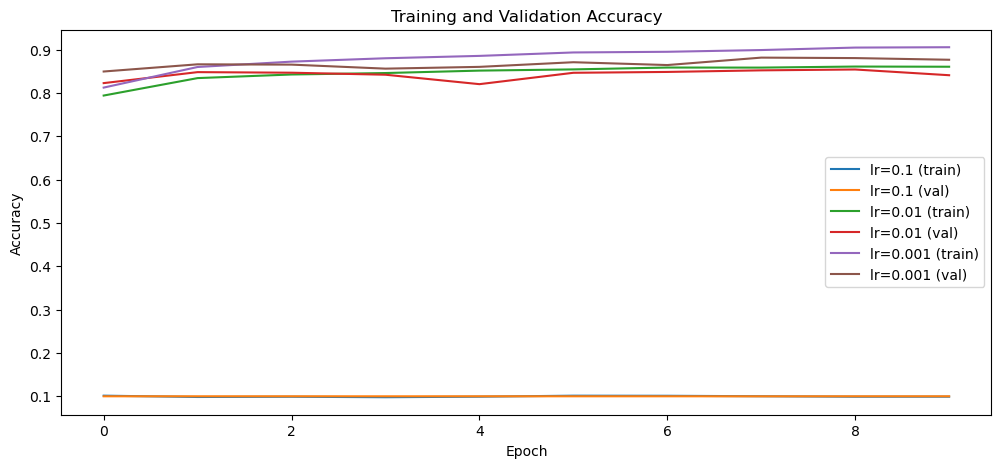

In [85]:
plt.figure(figsize=(12, 5))
for i, history in enumerate(histories):
    lr = learning_rates[i]
    plt.plot(history.history['accuracy'], label=f'lr={lr} (train)')
    plt.plot(history.history['val_accuracy'], label=f'lr={lr} (val)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

From the training curves it can be inferred that with smaller learning rates, the model seems to perform better. And from the curves it can also be inferred that the model is not suffering from any significant over or under fitting problems. 

A learning rate of 0.001 is therefore fixed.

# **6. Run inference**

Run inference in the test set and compute the metrics for testing.

In [86]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

438/438 [==============================] - 1s 2ms/step - loss: 0.3501 - accuracy: 0.8755
Test Loss: 0.35009175539016724
Test Accuracy: 0.8755000233650208


# **7. Test samples**

Show some samples from the test set. Use the following layout: input image, reference class and predicted class.

1/1 [==============================] - 0s 34ms/step


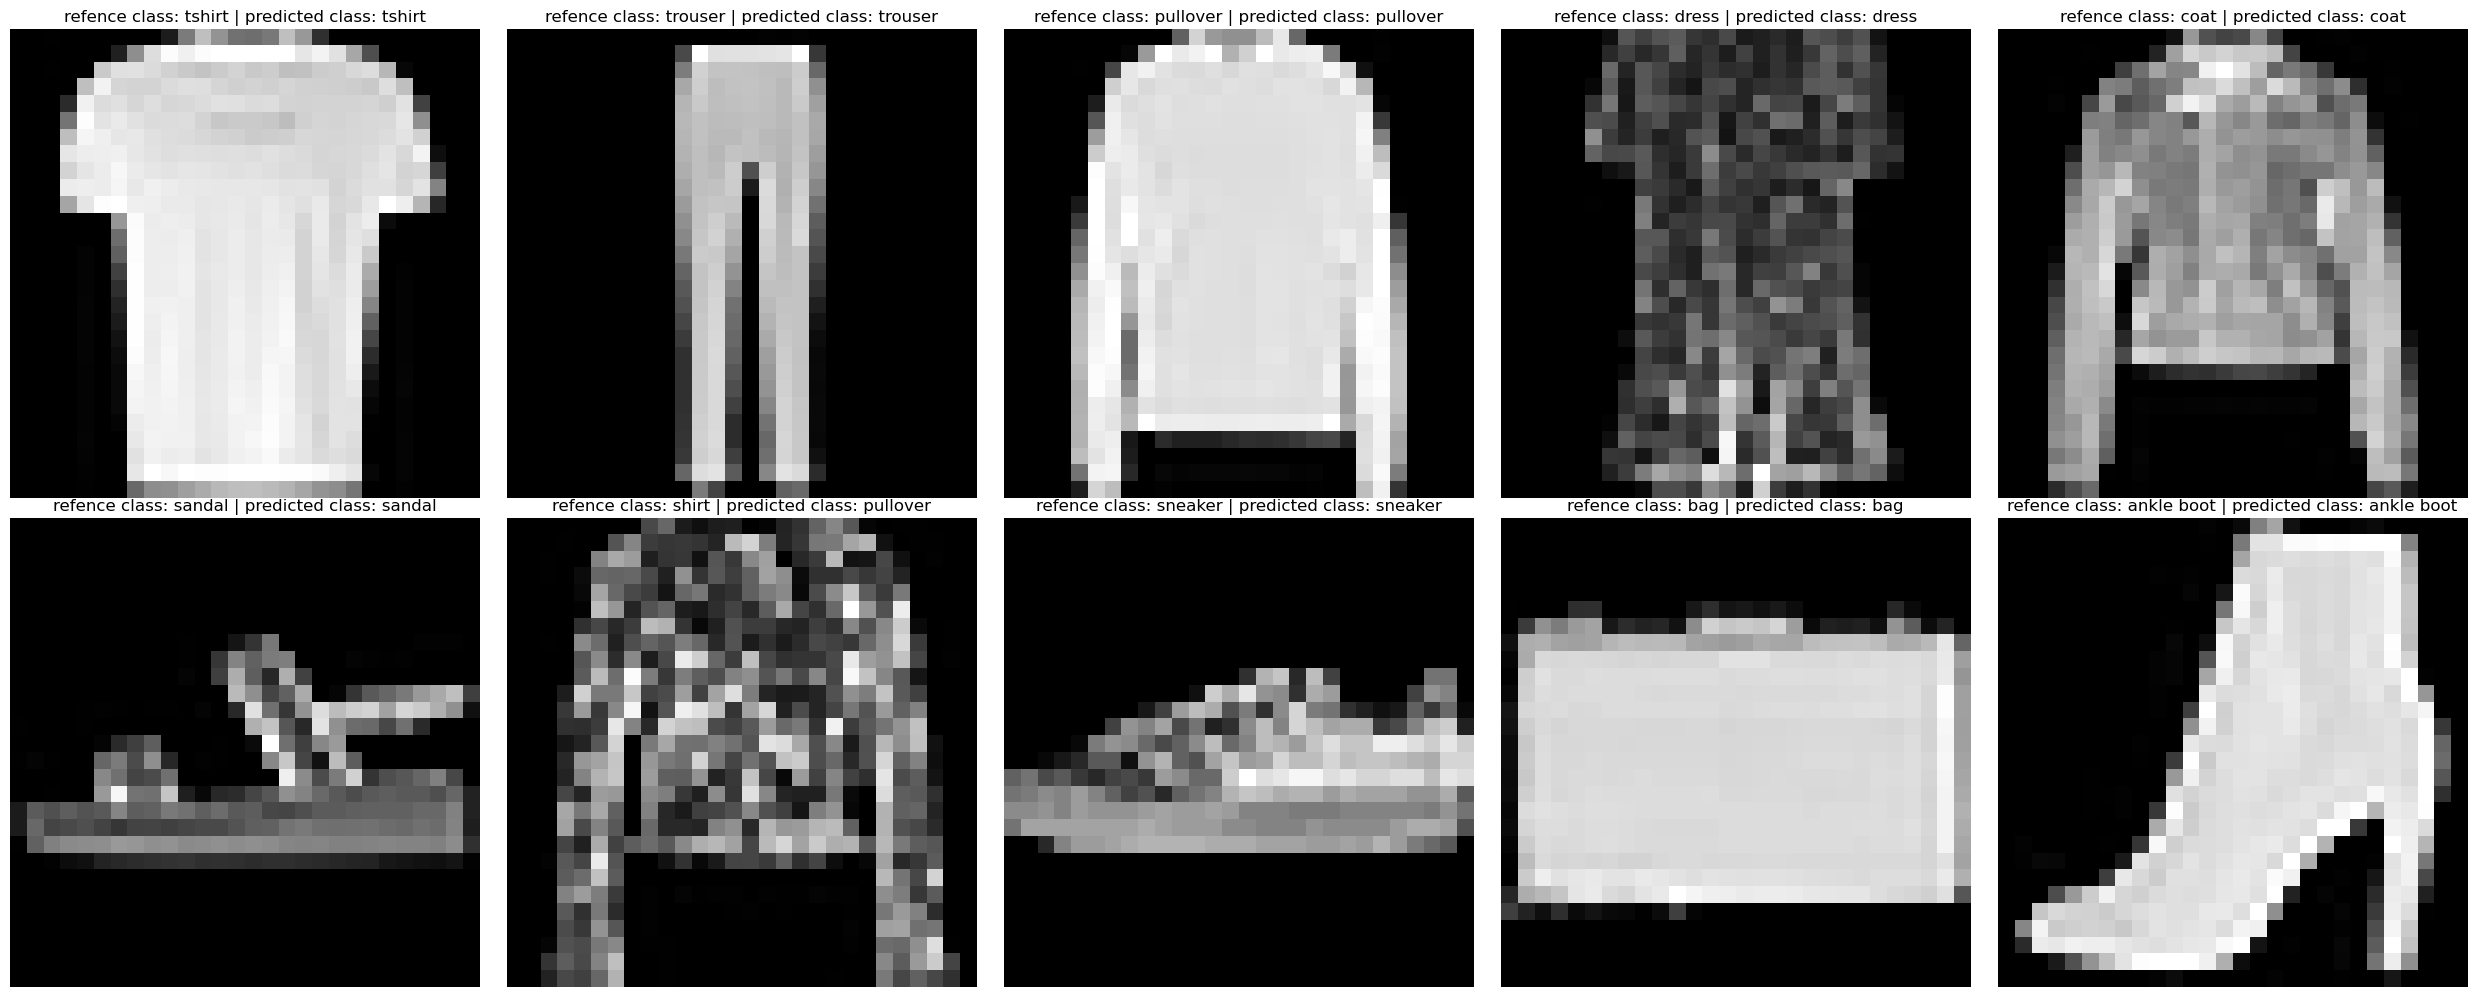

In [96]:
plt.figure(figsize=(25, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    test = X_test[y_test == i].iloc[0].to_numpy().reshape(28,28)
    plt.imshow(test, cmap='gray')
    pred = model.predict(test.reshape(1, 784))
    idx = np.argmax(pred[0])
    pred_class = classes[idx]
    plt.title(f'refence class: {classes[i]} | predicted class: {pred_class}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# **8. Testing with new images**


Test the model with at least two images (from internet or take a photo with your phone or camera). 

Do not forget to convert the image to the Fashion MNIST format: grayscale, $28\times 28$, apply normalization, etc. 

Comment the results.

In [93]:
from PIL import Image

# Load and preprocess new images
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28
    img = np.array(img) / 255.0  # Normalize pixel values
    return img

# image path
image_paths = [
    r'C:\Users\Lenovo\Documents\Semester_4\Deep Learning\Entry Task\ankleboot2.jpg',
    r'C:\Users\Lenovo\Documents\Semester_4\Deep Learning\Entry Task\bag1.jpg',
    r'C:\Users\Lenovo\Documents\Semester_4\Deep Learning\Entry Task\tshirt.jpg'
]

#image_classification using the model
for image_path in image_paths:
    image = preprocess_image(image_path)
    prediction = model.predict(image.reshape(1, 784,))
    print("Predicted class for", image_path, ":", classes[np.argmax(prediction)])


1/1 [==============================] - 0s 26ms/step
Predicted class for C:\Users\Lenovo\Documents\Semester_4\Deep Learning\Entry Task\ankleboot2.jpg : ankle boot
1/1 [==============================] - 0s 45ms/step
Predicted class for C:\Users\Lenovo\Documents\Semester_4\Deep Learning\Entry Task\bag1.jpg : bag
1/1 [==============================] - 0s 49ms/step
Predicted class for C:\Users\Lenovo\Documents\Semester_4\Deep Learning\Entry Task\tshirt.jpg : ankle boot


# **9. How could we improve the trained model?**

Share your ideas and comments to further improve the results.

As it can be seen from the above examples, the model is not accurately classifiying real world data.

For example the last image of a tshirt gets wrongly classified as an ankle boot.

As our model is performing well with around 87 percent accuracy on test data, we can mitigate this problem of over-fitting, feature extraction by changing the network architecture (no.of neurons per layer, no. of layers), regularization techniques,  data augementation techniques etc .